In [159]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
import scipy
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import a_funciones as fn 
from a_funciones import *
from collections import Counter
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [160]:
df_2015 = pd.read_csv("https://raw.githubusercontent.com/juantoro5/Analitica-para-RH-E7/main/2015.csv", sep=",")
df_2016 = pd.read_csv("https://raw.githubusercontent.com/juantoro5/Analitica-para-RH-E7/main/2016.csv", sep=",")


In [161]:
df_2015

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0.785714,0.178571,0.25,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,...,1,0,1,0,0,0,0,0,1,0
1,2,0.309524,0.321429,0.00,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,...,0,0,1,0,0,0,0,0,0,1
2,3,0.333333,0.571429,0.75,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,...,0,0,0,0,0,1,0,0,1,0
3,4,0.476190,0.035714,1.00,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,...,0,0,1,0,0,0,0,0,1,0
4,5,0.333333,0.321429,0.00,0.00,0.070195,0.444444,0.071429,0.666667,0.333333,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0.571429,0.142857,0.75,0.00,0.264350,0.333333,0.428571,0.333333,0.833333,...,0,0,0,0,1,0,0,0,0,1
4406,4407,0.261905,0.035714,0.75,0.00,0.087941,0.222222,0.285714,0.000000,0.333333,...,0,0,0,0,1,0,0,1,0,0
4407,4408,0.166667,0.857143,0.25,0.25,0.141811,0.000000,0.642857,0.000000,0.666667,...,0,0,1,0,0,0,0,0,1,0
4408,4409,0.571429,0.607143,0.25,0.00,0.073144,0.000000,0.214286,0.333333,0.333333,...,1,0,0,0,1,0,0,1,0,0


In [162]:
print(df_2015.value_counts())

EmployeeID  Age       DistanceFromHome  Education  JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TrainingTimesLastYear  YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  JobInvolvement  Attrition  AñoEncu  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  EducationField_Human Resources  EducationField_Life Sciences  EducationField_Marketing  EducationField_Medical  EducationField_Other  EducationField_Technical Degree  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single
8813        0.452381  0.035714          0.50       0.00      0.157557       0.666667            0.000000           0.333333          0.333333               0.000000                 0.000000                 0.666667         0.666667         0.666667        0.0        2015     0                          1             

In [163]:
df_2016

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0.785714,0.178571,0.25,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,...,1,0,1,0,0,0,0,0,1,0
1,2,0.309524,0.321429,0.00,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,...,0,0,1,0,0,0,0,0,0,1
2,3,0.333333,0.571429,0.75,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,...,0,0,0,0,0,1,0,0,1,0
3,4,0.476190,0.035714,1.00,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,...,0,0,1,0,0,0,0,0,1,0
4,5,0.333333,0.321429,0.00,0.00,0.070195,0.444444,0.071429,0.666667,0.333333,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0.571429,0.142857,0.75,0.00,0.264350,0.333333,0.428571,0.333333,0.833333,...,0,0,0,0,1,0,0,0,0,1
4406,4407,0.261905,0.035714,0.75,0.00,0.087941,0.222222,0.285714,0.000000,0.333333,...,0,0,0,0,1,0,0,1,0,0
4407,4408,0.166667,0.857143,0.25,0.25,0.141811,0.000000,0.642857,0.000000,0.666667,...,0,0,1,0,0,0,0,0,1,0
4408,4409,0.571429,0.607143,0.25,0.00,0.073144,0.000000,0.214286,0.333333,0.333333,...,1,0,0,0,1,0,0,1,0,0


In [164]:
df_2016.value_counts()

EmployeeID  Age       DistanceFromHome  Education  JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TrainingTimesLastYear  YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  JobInvolvement  AñoEncu  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  EducationField_Human Resources  EducationField_Life Sciences  EducationField_Marketing  EducationField_Medical  EducationField_Other  EducationField_Technical Degree  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single
8813        0.452381  0.035714          0.50       0.00      0.157557       0.666667            0.000000           0.333333          0.333333               0.000000                 0.000000                 0.666667         0.666667         0.666667        2016     0                          1                                 0 

In [165]:
# Definir X e y para el entrenamiento usando df_2015
X = df_2015.drop(columns=['AñoEncu', 'Attrition'])  # Variables independientes
y = df_2015['Attrition']  # Variable dependiente

In [166]:
# Definir X_test para la predicción (datos de 2016)
X_test = df_2016.drop(columns=['AñoEncu']) 

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de validación: ', X_test.shape)

Tamaño del conjunto de entrenamiento:  (3528, 30)
Tamaño del conjunto de validación:  (882, 30)


In [168]:
modelo_regresion = LogisticRegression(max_iter=10000)
modelo_regresion.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [169]:
y_pred_2016 = modelo_regresion.predict(X_test)

print("Predicciones de Attrition para 2016: ", y_pred_2016)

Predicciones de Attrition para 2016:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

MODELO 1. REGRESIÓN LOGÍSTICA

In [170]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
logistic_model = LogisticRegression(max_iter = 100000)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

#y_pred = logistic_model.predict(X_test)
#print("Predicciones del conjunto de prueba: ", y_pred)


LogisticRegression(max_iter=100000)

In [171]:
# Hacer predicciones
y_pred_2016 = logistic_model.predict(X_test)

In [172]:
#cambiarlo
# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [173]:
# Calcular ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.7216697490092471


In [174]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_2016)
print(f'Matriz de confusión: \n{conf_matrix}')

Matriz de confusión: 
[[746  11]
 [107  18]]


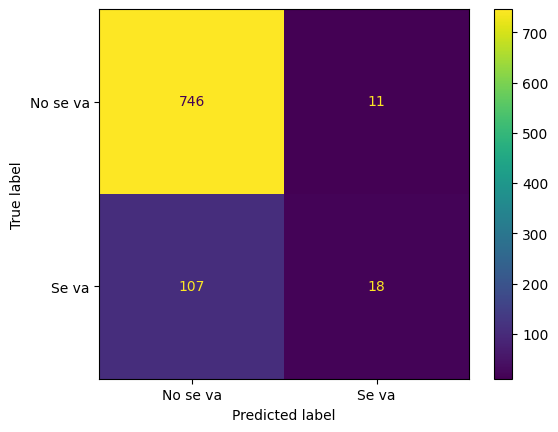

In [175]:
conf_matrix2 = confusion_matrix(y_test, y_pred_2016)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix2, display_labels = ['No se va', 'Se va'])
conf_matrix_display.plot()
plt.show()

In [176]:
# Reporte de clasificación
class_report = classification_report(y_test, y_pred_2016)
print(f'Reporte de clasificación: \n{class_report}')

Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       757
         1.0       0.62      0.14      0.23       125

    accuracy                           0.87       882
   macro avg       0.75      0.56      0.58       882
weighted avg       0.84      0.87      0.83       882



In [177]:
print("Distribución de clases en y_train:")
print(y_train.value_counts())

print("\nDistribución de clases en y_test:")
print(y_test.value_counts())


Distribución de clases en y_train:
Attrition
0.0    3003
1.0     525
Name: count, dtype: int64

Distribución de clases en y_test:
Attrition
0.0    757
1.0    125
Name: count, dtype: int64


REGRESIÓN LOGÍSTICA CON BALANCEO

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de regresión logística con balanceo de clases
logistic_modelB = LogisticRegression(class_weight='balanced', random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento
logistic_modelB.fit(X_train, y_train)

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=123)

In [179]:
# Hacer predicciones en el conjunto de prueba
y_pred = logistic_modelB.predict(X_test)

In [180]:
# Calcular ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logistic_modelB.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.7126129458388375


In [181]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(conf_matrix)

Matriz de confusión: 
[[509 248]
 [ 45  80]]


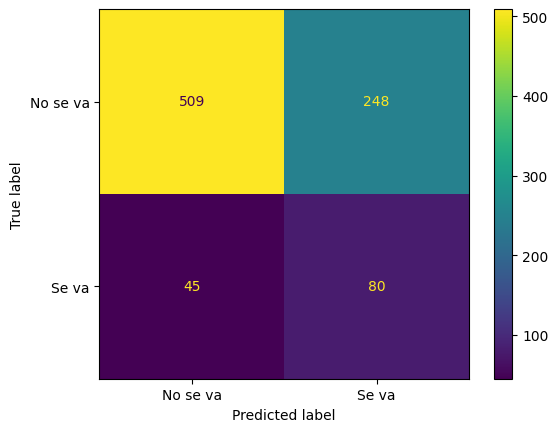

In [182]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

In [183]:
# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación: ")
print(class_report)

Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78       757
         1.0       0.24      0.64      0.35       125

    accuracy                           0.67       882
   macro avg       0.58      0.66      0.56       882
weighted avg       0.82      0.67      0.72       882



MODELO 2. RANDOM FOREST

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Random Forest sin balanceo de clases
rf_model = RandomForestClassifier(random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=123)

In [185]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [186]:
# Calcular ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9832073976221929


In [187]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación: ")
print(class_report)

Matriz de confusión: 
[[756   1]
 [ 10 115]]
Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       757
         1.0       0.99      0.92      0.95       125

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.97       882
weighted avg       0.99      0.99      0.99       882



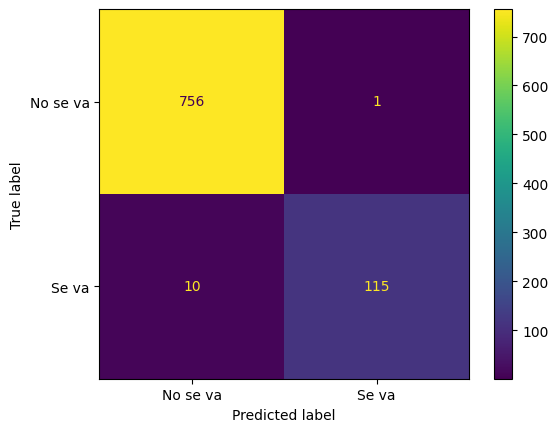

In [188]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

RANDOM FOREST CON BALANCEO

In [189]:
# Crear el modelo de Random Forest con balanceo de clases
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model_balanced.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=123)

In [190]:
# Hacer predicciones en el conjunto de prueba
y_pred_balanced = rf_model_balanced.predict(X_test)

In [191]:
# Calcular ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, rf_model_balanced.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9847978863936592


In [192]:
# Matriz de confusión con balanceo
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Matriz de confusión con balanceo: ")
print(conf_matrix_balanced)

# Reporte de clasificación con balanceo
class_report_balanced = classification_report(y_test, y_pred_balanced)
print("Reporte de clasificación con balanceo: ")
print(class_report_balanced)

Matriz de confusión con balanceo: 
[[757   0]
 [ 14 111]]
Reporte de clasificación con balanceo: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       757
         1.0       1.00      0.89      0.94       125

    accuracy                           0.98       882
   macro avg       0.99      0.94      0.97       882
weighted avg       0.98      0.98      0.98       882



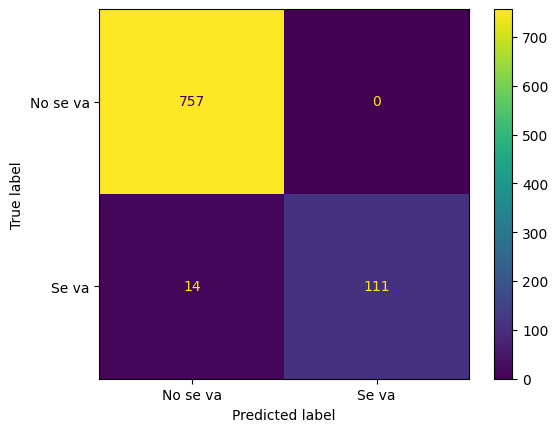

In [193]:
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

MODELO 3. XGBoost

In [194]:
#pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de XGBoost sin balanceo de clases
xgb_model = xgb.XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo con el conjunto de entrenamiento
xgb_model.fit(X_train, y_train)


c:\Users\Juan Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=123, ...)

In [195]:
# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [196]:
# Calcular ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9792338177014531


In [197]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación: ")
print(class_report)

Matriz de confusión: 
[[755   2]
 [  6 119]]
Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       757
         1.0       0.98      0.95      0.97       125

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



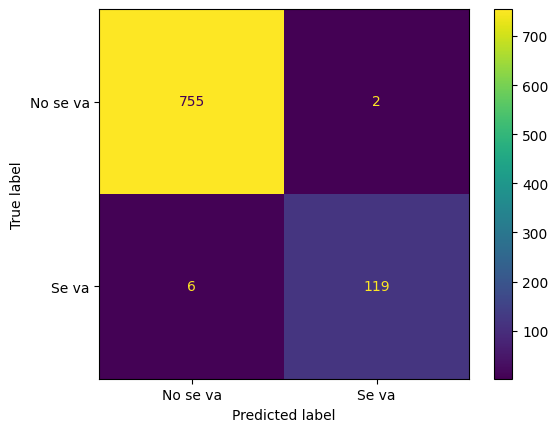

In [198]:
#confusion
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

XGBoost con balanceo

In [199]:
# Calcular el peso de balance (proporción entre las clases)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Crear el modelo de XGBoost con balanceo de clases
xgb_model_balanced = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=123, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo con el conjunto de entrenamiento
xgb_model_balanced.fit(X_train, y_train)

c:\Users\Juan Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=123, ...)

In [200]:
# Hacer predicciones en el conjunto de prueba
y_pred_balanced = xgb_model_balanced.predict(X_test)


In [201]:
# Calcular ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, xgb_model_balanced.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9788322324966975


In [202]:

# Matriz de confusión con balanceo
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Matriz de confusión con balanceo: ")
print(conf_matrix_balanced)

# Reporte de clasificación con balanceo
class_report_balanced = classification_report(y_test, y_pred_balanced)
print("Reporte de clasificación con balanceo: ")
print(class_report_balanced)

Matriz de confusión con balanceo: 
[[754   3]
 [  6 119]]
Reporte de clasificación con balanceo: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       757
         1.0       0.98      0.95      0.96       125

    accuracy                           0.99       882
   macro avg       0.98      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



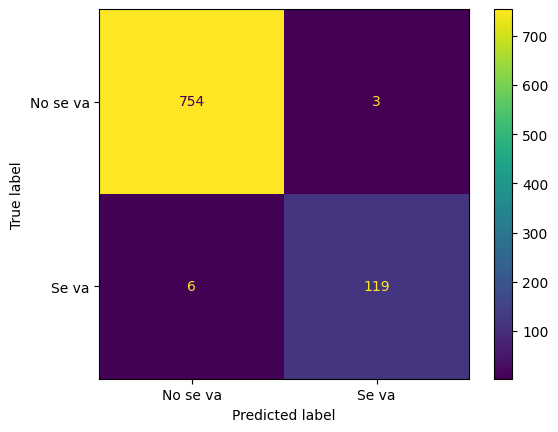

In [203]:
#confusion
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

# SELECCIÓN DE MODELO

Se selecciona el modelo de XG Boost sin balanceo, ya que:

Tiene el F1 Score más alto (0.97), lo que indica un buen equilibrio entre precisión y recall. Esto es importante, dado que el F1 score captura tanto la capacidad del modelo para identificar correctamente los retiros (recall) como para minimizar falsos positivos (precision).

Su Precision Es alta (0.98), lo que significa que de las predicciones de retiros, la gran mayoría son correctas.

Recall: Tiene un valor también muy alto (0.95), indicando que el modelo está capturando casi todos los casos de retiros reales.

AUC ROC: Está cerca de 1 (0.979), lo que significa que el modelo tiene una muy buena capacidad de distinguir entre quienes se retiran y quienes no.

In [204]:
#Ponerle matriz de confusion?

HIPERPARÁMETRO 1

In [205]:
#OPCION 1

# Importar librerias adicionales
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pprint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier


In [206]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
xgb = XGBClassifier(random_state=123)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Configurar la búsqueda de hiperparámetros con GridSearch
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)


In [207]:
# Entrenar el modelo con GridSearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=123, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [208]:
# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros: ", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Mejores hiperparámetros:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       757
         1.0       0.97      0.95      0.96       125

    accuracy                           0.99       882
   macro avg       0.98      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



In [209]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, classification_report
# Calcular métricas adicionales: F1 Score, Precision, Recall para la clase 1.0 (retiros)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Precision para clase 1.0: {precision}")
print(f"Recall para clase 1.0: {recall}")
print(f"F1 Score para clase 1.0: {f1_score}")
print(f"AUC-ROC para clase 1.0: {roc_auc}")


Precision para clase 1.0: 0.967479674796748
Recall para clase 1.0: 0.952
F1 Score para clase 1.0: 0.9596774193548387
AUC-ROC para clase 1.0: 0.9835350066050198


Evaluando el modelo ganador con y sin Hiperparametros, el modelo XGBoost sin Hiperparamentros muestra mejores metricas (F1 Score, Recall y Precision)

In [211]:
# Exportar el modelo XGBoost sin balanceo de clases
joblib.dump(xgb_model, "modelo_ganador.pkl")
print("Modelo exportado exitosamente como 'modelo_ganador.pkl'")

Modelo exportado exitosamente como 'modelo_ganador.pkl'
